<center><h1>Driver Drowsiness Detection</h1></center>

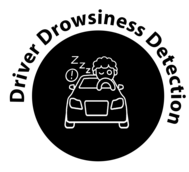

## Team Hawks:

- Ananya Reddy Komatireddy
- Sri Sai Srikanth Reddy Vundyala

### Problem Statement:

One of the main causes of many auto accidents is driver weariness and drowsiness. A significant problem in the field of accident prevention systems is the development and upkeep of technologies that can effectively detect or prevent tiredness at the wheel and warn the driver before an accident. The problems that drowsiness can pose on the road require the development of strategies to mitigate its impact. With the development of technology and real-time scanner systems using cameras, we can prevent serious traffic accidents by warning the motorist who is starting to nod off.<br><br>

Because of the nature of the issue, drowsiness/fatigue is a safety issue that no nation in the world has fully addressed. In contrast to drugs and alcohol, which have obvious essential tests and signs that are readily available on the market, drowsiness is generally very difficult to measure or observe. The goal of our prototype ***Driver Drowsiness Detector (DDD)*** is to monitor the condition of the driver’s eyes continually and correctly in real time to determine whether they have been open or closed for longer than a certain amount of time.


### Data Acquisition:

Thanks to Kaggle for providing us with the following two datasets that we have used throughout the notebook.

- dataset1: https://www.kaggle.com/datasets/dheerajperumandla/drowsiness-dataset
- dataset2: https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault
from tensorflow.keras.preprocessing import image
import dask.bag as bag
from dask.diagnostics import ProgressBar
from PIL import Image

### Basic EDA

- We first extract the number of images in each class belonging to two datasets.
- This is done to plot a bar graph to see if there is any class imbalance in both the datasets

In [2]:
#Data Set 1
number_classes1 = {'Closed_eyes': len(os.listdir("data/dataset1/Closed/")),
'Open_eyes': len(os.listdir("data/dataset1/Open")),
'No_yawn': len(os.listdir("data/dataset1/no_yawn")),
'Yawn': len(os.listdir("data/dataset1/yawn"))}

#Data Set 2
number_classes2 = {'Closed_eyes': len(os.listdir("data/dataset2/Closed_Eyes")),
'Open_eyes': len(os.listdir("data/dataset2/Open_Eyes"))}


Resource: https://plotly.com/python/subplots/

In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("First Dataset","Second Dataset"))

fig.add_trace(go.Bar(x=list(number_classes1.keys()), y=list(number_classes1.values())),1, 1)

fig.add_trace(go.Bar(x=list(number_classes2.keys()), y=list(number_classes2.values())), 1, 2)

fig.update_layout(title_text="Class Distribution", showlegend=False)

fig.show()

Both the datasets are almost perfectly distributed among all the classes! Let's continue with the EDA.

In [4]:
def get_image_dimensions(image_path):
    image = Image.open(image_path)
    return image.size[1], image.size[0]

In [5]:
#Data Set 1
paths_dataset1 = {'Closed_eyes': "data/dataset1/Closed/",
'Open_eyes': "data/dataset1/Open/"}

#Data Set 2
paths_dataset2 = {'Closed_eyes': "data/dataset2/Closed_Eyes/",
'Open_eyes': "data/dataset2/Open_Eyes/"}

Resources: 
- https://plotly.com/python/line-and-scatter/
- https://plotly.com/python/subplots/

In [6]:
fig = make_subplots(rows = 1, cols = 2)
coln = 1
for class_name, destination in paths_dataset1.items():
    filepath = destination  
    filelist = [filepath + f for f in os.listdir(filepath)]
    dimensions = bag.from_sequence(filelist).map(get_image_dimensions)
    dimensions = dimensions.compute()
    dimensions_df = pd.DataFrame(dimensions, columns=['height', 'width'])
    sizes = dimensions_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    fig.add_trace(
        go.Scatter(x=sizes.width, y=sizes.height, mode='markers', marker = dict(opacity = 0.6), name = class_name),
        row = 1, col = coln
    )
    coln += 1
    
fig.update_yaxes(title_text="Height", row=1, col=1)
fig.update_xaxes(title_text="Width", row=1, col=1)

fig.update_yaxes(title_text="Height", row=1, col=2)
fig.update_xaxes(title_text="Width", row=1, col=2)
fig.update_layout(title_text="Dataset 1 - Height vs Width Scatter Plot")
fig.show()

In [7]:
fig = make_subplots(rows = 1, cols = 2)
coln = 1
for class_name, destination in paths_dataset2.items():
    filepath = destination  
    filelist = [filepath + f for f in os.listdir(filepath)]
    dimensions = bag.from_sequence(filelist).map(get_image_dimensions)
    dimensions = dimensions.compute()
    dimensions_df = pd.DataFrame(dimensions, columns=['height', 'width'])
    sizes = dimensions_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    fig.add_trace(
        go.Scatter(x=sizes.width, y=sizes.height, mode='markers', marker = dict(opacity = 0.6), name = class_name),
        row = 1, col = coln
    )
    coln += 1
    
fig.update_yaxes(title_text="Height", row=1, col=1)
fig.update_xaxes(title_text="Width", row=1, col=1)

fig.update_yaxes(title_text="Height", row=1, col=2)
fig.update_xaxes(title_text="Width", row=1, col=2)
fig.update_layout(title_text="Dataset 2 - Height vs Width Scatter Plot")
fig.show()

Both the datasets have images which are well-proportionated considering the linearity in the Scatter Plots. 

There is a little noise in Scatter Plot 1 because the images are raw and not preprocessed to fit a certain scale. 
Whereas Scatter Plot 2 is extremely linear and doesn't display any signs of disturbance because the images are preprocessed already to fit a certain scale. This can be observed in the very next section where we display a few images from all the classes in both the datasets.

TIP: Plotly graphs can be zoomed in on selected sections to see how the plot is distributed on a smaller scale.

Fun Fact: None of the images in dataset 2 are overlapping in the scatter plot, which can be observed using the above tip!

### Advanced EDA for dataset1

#### Displaying random images from dataset1

Resources: 
- https://www.codespeedy.com/how-to-show-random-picture-from-a-folder-in-python/
- https://www.geeksforgeeks.org/random-choices-method-in-python/

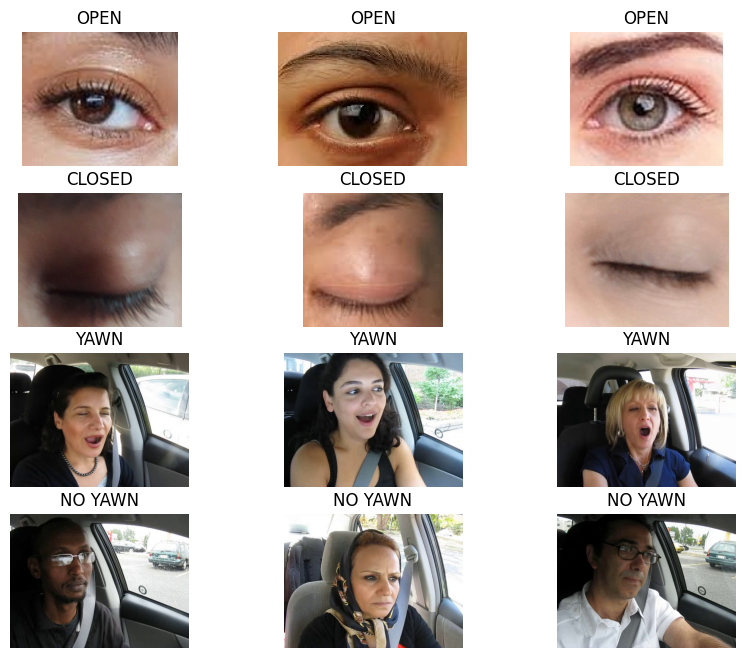

In [8]:
import os, random 

train_dir = 'data/dataset1'
select_close = random.choices(os.listdir(f'{train_dir}/Closed'), k = 3)
select_close = ["data/dataset1/Closed/" + s for s in select_close]
select_open = random.choices(os.listdir(f'{train_dir}/Open'), k = 3)
select_open = ["data/dataset1/Open/" + s for s in select_open]
select_yawn = random.choices(os.listdir(f'{train_dir}/yawn'), k = 3)
select_yawn = ["data/dataset1/yawn/" + s for s in select_yawn]
select_no_yawn = random.choices(os.listdir(f'{train_dir}/no_yawn'), k = 3)
select_no_yawn = ["data/dataset1/no_yawn/" + s for s in select_no_yawn]


fig = plt.figure(figsize = (10,8))
for i in range(12):
    if i < 3:
        fp = select_open[i]
        label = 'OPEN'
    elif i>=3 and i<6:
        fp = select_close[i-3]
        label = 'CLOSED'
    elif i>=6 and i<9:
        fp = select_yawn[i-6]
        label = 'YAWN'
    else:
        fp = select_no_yawn[i-9]
        label = "NO YAWN"
    ax = fig.add_subplot(4, 3, i+1)
    
    fn = image.load_img(fp)
    plt.imshow(fn)
    plt.title(label)
    plt.axis('off')
plt.show()

As mentioned in the last step of the basic EDA, the images in the first dataset are not preprocessed.

So, the next few steps will be implementing these following stages:
- Each image from the open eyes and closed eye directories are taken and converted into 1D arrays using the ravel() function.
- A list of these 1D arrays are created giving a list of lists for each class in the dataset
- The mean of the lists in each list is calculated and converted back into an image in grayscale, this generates an average image belonging to each class.

The average images are created to generate a contrast heatmap to spot the difference between an average image belonging "Open Class" and "Closed Class".

In [9]:
train_dir = 'data/dataset1'
all_closed_imgs = [fn for fn in os.listdir(f'{train_dir}/Closed') if fn.endswith('.jpg')]
all_open_imgs = [fn for fn in os.listdir(f'{train_dir}/Open') if fn.endswith('.jpg')]

def img_to_list_of_1D(path_to_img_directory, list_of_images, size = (100, 100)):
    for fn in list_of_images:
        fp = path_to_img_directory + fn
        current_image = image.load_img(fp, target_size = size, color_mode = 'grayscale')
        img_np_array = image.img_to_array(current_image)
        img_np_array = [img_np_array.ravel()]
        try:
            full_mat = np.concatenate((full_mat, img_np_array))
        except UnboundLocalError: 
            full_mat = img_np_array
    return full_mat

open_images_matrix_collection = img_to_list_of_1D(f'{train_dir}/Open/', all_open_imgs)
closed_images_matrix_collection = img_to_list_of_1D(f'{train_dir}/Closed/', all_closed_imgs)

In [10]:
open_images_matrix_collection

array([[ 70.,  80.,  83., ..., 108., 106., 106.],
       [176., 180., 172., ..., 207., 208., 209.],
       [ 78., 106., 112., ..., 132., 129., 128.],
       ...,
       [ 92.,  88.,  86., ..., 232., 229., 225.],
       [ 86.,  84.,  89., ..., 128., 127., 126.],
       [172., 179., 108., ..., 232., 230., 230.]], dtype=float32)

#### Concatenating all the images belonging to the same class to get an average image

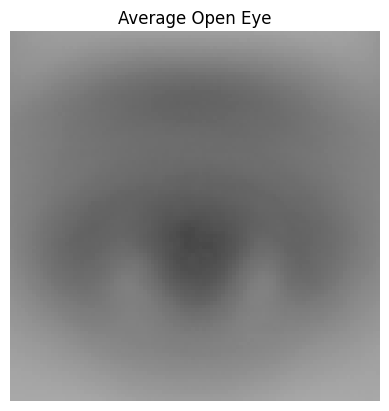

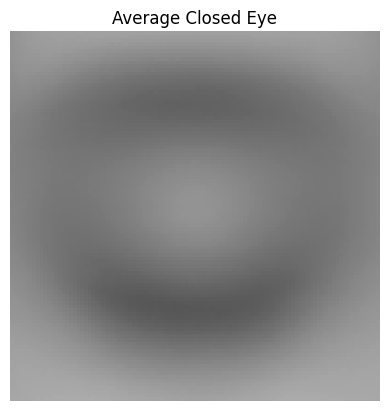

In [11]:
def find_mean_img(full_mat, title, size = (100, 100)):
    mean_img = np.mean(full_mat, axis = 0)
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

open_mean = find_mean_img(open_images_matrix_collection, 'Open Eye')
closed_mean = find_mean_img(closed_images_matrix_collection, 'Closed Eye')

#### Contrast between both the classes

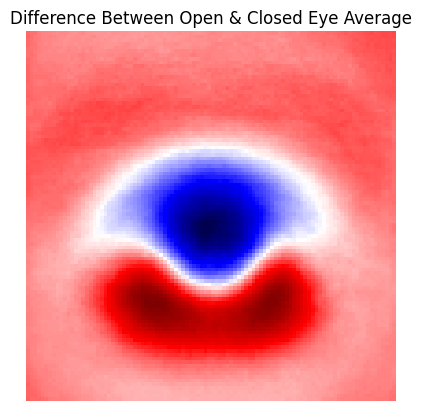

In [12]:
contrast_mean = open_mean - closed_mean
plt.imshow(contrast_mean, cmap='seismic')
plt.title(f'Difference Between Open & Closed Eye Average')
plt.axis('off')
plt.show()

### Advanced EDA for dataset 2

For the sake of comparison, we are going to apply the same advanced EDA steps to the second dataset.

#### Displaying random images from dataset2

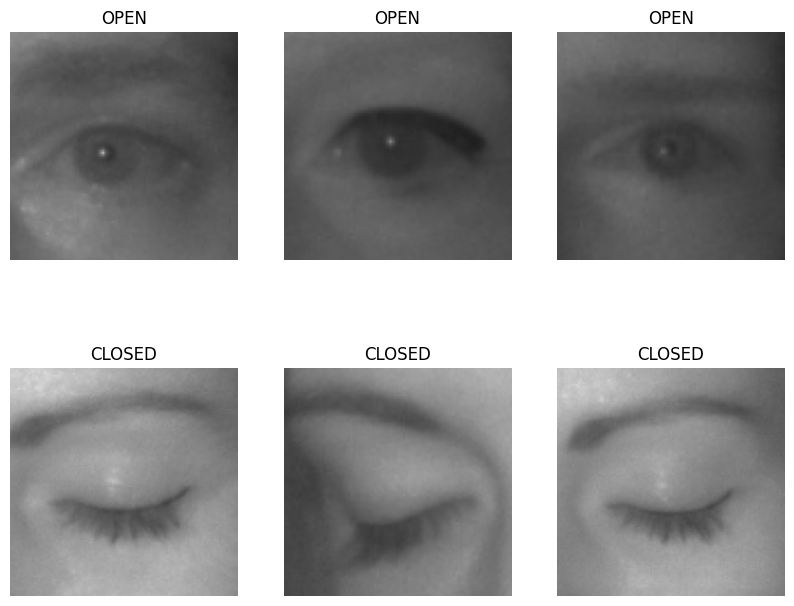

In [13]:
import os, random 

train_dir = 'data/dataset2'
select_close = random.choices(os.listdir(f'{train_dir}/Closed_Eyes'), k = 3)
select_close = ["data/dataset2/Closed_Eyes/" + s for s in select_close]
select_open = random.choices(os.listdir(f'{train_dir}/Open_Eyes'), k = 3)
select_open = ["data/dataset2/Open_Eyes/" + s for s in select_open]


fig = plt.figure(figsize = (10,8))
for i in range(6):
    if i < 3:
        fp = select_open[i]
        label = 'OPEN'
    else:
        fp = select_close[i-3]
        label = 'CLOSED'
    ax = fig.add_subplot(2, 3, i+1)
    
    fn = image.load_img(fp)
    plt.imshow(fn)
    plt.title(label)
    plt.axis('off')
plt.show()

Preprocessed images in the datasets caused the linear relationship observed in the Basic EDA.

#### Concatenating all the images belonging to the same class to get an average image

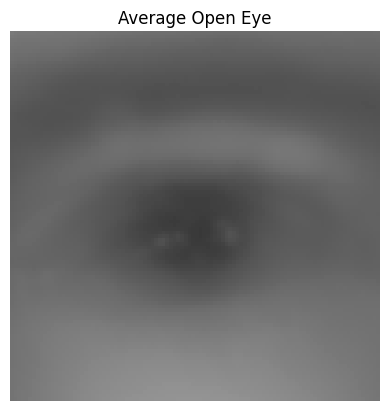

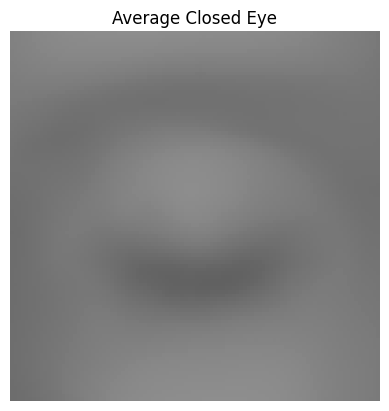

In [14]:
train_dir = 'data/dataset2'
all_closed_imgs = [fn for fn in os.listdir(f'{train_dir}/Closed_Eyes') if fn.endswith('.png')]
all_open_imgs = [fn for fn in os.listdir(f'{train_dir}/Open_Eyes') if fn.endswith('.png')]


open_images_matrix_collection = img_to_list_of_1D(f'{train_dir}/Open_Eyes/', all_open_imgs)
closed_images_matrix_collection = img_to_list_of_1D(f'{train_dir}/Closed_Eyes/', all_closed_imgs)


open_mean = find_mean_img(open_images_matrix_collection, 'Open Eye')
closed_mean = find_mean_img(closed_images_matrix_collection, 'Closed Eye')

#### Contrast between both the classes

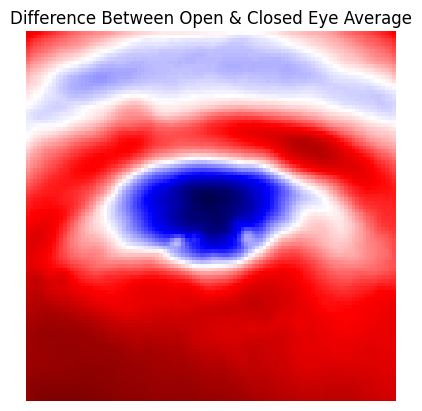

In [15]:
contrast_mean = open_mean - closed_mean
plt.imshow(contrast_mean, cmap='seismic')
plt.title(f'Difference Between Open & Closed Eye Average')
plt.axis('off')
plt.show()

To be honest both the datasets look equally good to be used further for modeling. Here's a detailed breakdown of what we think of each of the datasets and why it is appropriate to carry on further with both of them.

Dataset 1:
- More classes compared to the second dataset, meaning more ways of detecting drowsiness.
- Challenge: This type of prediction can just be done in image classification. Using the trained model to capture live yawns can be a challenge that is beyond the scope of this project. (We will be eliminating the use of yawn and no_yawn classes here on out)
- The dataset isn't "prepared", allowing us to demonstrate a few preprocessing techniques for image classification, not an ideal reason in reality but a good reason to *choose this dataset for the project*.

Dataset 2:
- More in volume compared to dataset 1 - 2000 images per class as opposed to approximately 750 images in dataset 1.
- Clean pictures!

### Preprocessing

Input: Raw, unformatted, RGB images of eyes.
<br><br>Expected output ater Data Preparation:
- Images converted into arrays(or any numerical form understood by the machines)
- Labels attached to the images in the cleaned dataset.
- Data split into training and test data

In [16]:
import cv2
def get_data(dir_path = r"data/dataset1"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    X = []
    y = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        print(class_num)
        for img in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
                X.append(resized_array)
                y.append(class_num)
            except Exception as e:
                print(e)
    return X, y

In [17]:
X_extracted, y_extracted = get_data()

0
1


In [18]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

X = np.array(X_extracted)
X = X.reshape(-1, 145, 145, 3)
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y_extracted)
y = np.array(y)
print(X)
print(y)

[[[[ 77  77  93]
   [ 75  75  91]
   [ 72  72  88]
   ...
   [140 123 136]
   [134 117 130]
   [133 119 131]]

  [[ 79  79  95]
   [ 78  78  94]
   [ 75  75  91]
   ...
   [126 109 122]
   [125 108 121]
   [123 109 121]]

  [[ 79  80  94]
   [ 79  80  94]
   [ 77  77  93]
   ...
   [120 103 116]
   [116  99 112]
   [118 104 116]]

  ...

  [[ 96  92 121]
   [ 96  92 121]
   [ 95  91 120]
   ...
   [101 101 131]
   [102 102 132]
   [101 101 131]]

  [[ 96  92 121]
   [ 96  92 121]
   [ 97  93 122]
   ...
   [102 102 132]
   [102 102 132]
   [ 99  99 129]]

  [[ 97  92 121]
   [ 96  91 120]
   [ 98  93 122]
   ...
   [100 103 131]
   [ 99 102 130]
   [ 97 100 128]]]


 [[[ 87 108 176]
   [ 89 110 178]
   [ 88 107 175]
   ...
   [ 86 110 164]
   [ 81 107 161]
   [ 75 101 155]]

  [[ 83 103 171]
   [ 82 103 171]
   [ 82 102 170]
   ...
   [ 83 107 161]
   [ 83 109 163]
   [ 79 105 159]]

  [[ 83 105 171]
   [ 80 102 168]
   [ 83 102 169]
   ...
   [ 63  87 142]
   [ 69  95 149]
   [ 71  97

**This is the actual prepared dataset that will be used**

In [19]:
X1 = np.array(X_extracted)
X1 = X1.reshape(-1, 145, 145, 3)
y1 = np.array(y_extracted)
print(X1)
print(y1)

[[[[ 77  77  93]
   [ 75  75  91]
   [ 72  72  88]
   ...
   [140 123 136]
   [134 117 130]
   [133 119 131]]

  [[ 79  79  95]
   [ 78  78  94]
   [ 75  75  91]
   ...
   [126 109 122]
   [125 108 121]
   [123 109 121]]

  [[ 79  80  94]
   [ 79  80  94]
   [ 77  77  93]
   ...
   [120 103 116]
   [116  99 112]
   [118 104 116]]

  ...

  [[ 96  92 121]
   [ 96  92 121]
   [ 95  91 120]
   ...
   [101 101 131]
   [102 102 132]
   [101 101 131]]

  [[ 96  92 121]
   [ 96  92 121]
   [ 97  93 122]
   ...
   [102 102 132]
   [102 102 132]
   [ 99  99 129]]

  [[ 97  92 121]
   [ 96  91 120]
   [ 98  93 122]
   ...
   [100 103 131]
   [ 99 102 130]
   [ 97 100 128]]]


 [[[ 87 108 176]
   [ 89 110 178]
   [ 88 107 175]
   ...
   [ 86 110 164]
   [ 81 107 161]
   [ 75 101 155]]

  [[ 83 103 171]
   [ 82 103 171]
   [ 82 102 170]
   ...
   [ 83 107 161]
   [ 83 109 163]
   [ 79 105 159]]

  [[ 83 105 171]
   [ 80 102 168]
   [ 83 102 169]
   ...
   [ 63  87 142]
   [ 69  95 149]
   [ 71  97

### Separating the Independent and Dependent variables 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size= 0.30)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42, test_size= 0.30)

#### Data Augmentation:
**Rescaled all images to fall between 0 and 1, to achieve faster processing**

In [21]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30, fill_mode='nearest')
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

train_generator1 = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30, fill_mode='nearest')
test_generator1 = ImageDataGenerator(rescale=1/255)

train_generator1 = train_generator1.flow(np.array(X1_train), y1_train, shuffle=False)
test_generator1 = test_generator1.flow(np.array(X1_test), y1_test, shuffle=False)

### Modeling

**model:**
- 4 3x3's pooled together after every layer.
- 1 Dense Layer with no dropout 
- Number of filters reduced in every layer. (256, 128, 64, 32)

In [22]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(145,145,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

**model_2:**
- 4 3x3's pooled together after every layer.
- 2 Dense Layers with dropout 
- Number of filters reduced in every layer.  (256, 128, 64, 32)

In [23]:
model_2 = Sequential()

model_2.add(Conv2D(256, (3, 3), activation="relu", input_shape=(145,145,3)))
model_2.add(MaxPooling2D(2, 2))

model_2.add(Conv2D(128, (3, 3), activation="relu"))
model_2.add(MaxPooling2D(2, 2))

model_2.add(Conv2D(64, (3, 3), activation="relu"))
model_2.add(MaxPooling2D(2, 2))

model_2.add(Conv2D(32, (3, 3), activation="relu"))
model_2.add(MaxPooling2D(2, 2))

model_2.add(Flatten())
model_2.add(Dropout(0.5))

model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.3))

model_2.add(Dense(64, activation="relu"))
model_2.add(Dropout(0.3))

model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

**model_3:**
- 1 3x3's and 2 2x2's pooled together after every layer.
- 2 Dense Layers without dropout 
- Number of filters reduced in every layer.  (256, 128, 64, 32)

In [24]:
model_3 = Sequential()

model_3.add(Conv2D(32, (3,3), activation="relu", input_shape=(145,145,3)))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Conv2D(64, (2,2), activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(128, (2,2), activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Dropout(0.25))
model_3.add(Flatten())

model_3.add(Dense(512, activation="relu"))

model_3.add(Dense(512, activation="relu"))

model_3.add(Dense(1, activation="sigmoid"))

model_3.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 143, 143, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 70, 70, 64)        8256      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       32896     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

Model "model" fit into dataset augmented with Binary Labelizer

In [25]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
32/32 [==============================] - 28s 363ms/step - loss: 0.6453 - accuracy: 0.6201 - val_loss: 0.2866 - val_accuracy: 0.9037
Epoch 2/50
32/32 [==============================] - 7s 219ms/step - loss: 0.3104 - accuracy: 0.8799 - val_loss: 0.1496 - val_accuracy: 0.9404
Epoch 3/50
32/32 [==============================] - 7s 218ms/step - loss: 0.2114 - accuracy: 0.9262 - val_loss: 0.1418 - val_accuracy: 0.9610
Epoch 4/50
32/32 [==============================] - 7s 215ms/step - loss: 0.1939 - accuracy: 0.9380 - val_loss: 0.1382 - val_accuracy: 0.9518
Epoch 5/50
32/32 [==============================] - 7s 218ms/step - loss: 0.1696 - accuracy: 0.9360 - val_loss: 0.1057 - val_accuracy: 0.9587
Epoch 6/50
32/32 [==============================] - 7s 215ms/step - loss: 0.1516 - accuracy: 0.9488 - val_loss: 0.0962 - val_accuracy: 0.9702
Epoch 7/50
32/32 [==============================] - 7s 215ms/step - loss: 0.1452 - accuracy: 0.9528 - val_loss: 0.1019 - val_accuracy: 0.9656
Epoch

Model "model" fit into dataset.

In [26]:
history1 = model.fit(train_generator1, epochs=50, validation_data=test_generator1, shuffle=True, validation_steps=len(test_generator1))

Epoch 1/50
32/32 [==============================] - 10s 283ms/step - loss: 0.0327 - accuracy: 0.9902 - val_loss: 0.0650 - val_accuracy: 0.9799
Epoch 2/50
32/32 [==============================] - 7s 226ms/step - loss: 0.0649 - accuracy: 0.9805 - val_loss: 0.0304 - val_accuracy: 0.9844
Epoch 3/50
32/32 [==============================] - 7s 224ms/step - loss: 0.0298 - accuracy: 0.9883 - val_loss: 0.0535 - val_accuracy: 0.9866
Epoch 4/50
32/32 [==============================] - 7s 225ms/step - loss: 0.0419 - accuracy: 0.9844 - val_loss: 0.0333 - val_accuracy: 0.9866
Epoch 5/50
32/32 [==============================] - 7s 224ms/step - loss: 0.0352 - accuracy: 0.9854 - val_loss: 0.0218 - val_accuracy: 0.9920
Epoch 6/50
32/32 [==============================] - 7s 225ms/step - loss: 0.0317 - accuracy: 0.9893 - val_loss: 0.0182 - val_accuracy: 0.9911
Epoch 7/50
32/32 [==============================] - 7s 223ms/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.0427 - val_accuracy: 0.9844
Epoch

Model "model_2" fit into dataset.

In [27]:
history2 = model_2.fit(train_generator1, epochs=50, validation_data=test_generator1, shuffle=True, validation_steps=len(test_generator1))

Epoch 1/50
32/32 [==============================] - 9s 239ms/step - loss: 0.6882 - accuracy: 0.5384 - val_loss: 0.6102 - val_accuracy: 0.7661
Epoch 2/50
32/32 [==============================] - 9s 273ms/step - loss: 0.4544 - accuracy: 0.8189 - val_loss: 0.2132 - val_accuracy: 0.9151
Epoch 3/50
32/32 [==============================] - 7s 228ms/step - loss: 0.2384 - accuracy: 0.9154 - val_loss: 0.1956 - val_accuracy: 0.9266
Epoch 4/50
32/32 [==============================] - 7s 230ms/step - loss: 0.3270 - accuracy: 0.8809 - val_loss: 0.2134 - val_accuracy: 0.9266
Epoch 5/50
32/32 [==============================] - 8s 259ms/step - loss: 0.2077 - accuracy: 0.9311 - val_loss: 0.1238 - val_accuracy: 0.9541
Epoch 6/50
32/32 [==============================] - 7s 228ms/step - loss: 0.1852 - accuracy: 0.9400 - val_loss: 0.1401 - val_accuracy: 0.9564
Epoch 7/50
32/32 [==============================] - 8s 237ms/step - loss: 0.1644 - accuracy: 0.9370 - val_loss: 0.1383 - val_accuracy: 0.9427
Epoch 

Model "model_3" fit into dataset.

In [28]:
history3 = model_3.fit(train_generator1, epochs=50, validation_data=test_generator1, shuffle=True, validation_steps=len(test_generator1))

Epoch 1/50
32/32 [==============================] - 7s 178ms/step - loss: 0.5754 - accuracy: 0.6683 - val_loss: 0.4202 - val_accuracy: 0.8440
Epoch 2/50
32/32 [==============================] - 5s 148ms/step - loss: 0.2490 - accuracy: 0.9114 - val_loss: 0.1818 - val_accuracy: 0.9243
Epoch 3/50
32/32 [==============================] - 5s 140ms/step - loss: 0.1632 - accuracy: 0.9390 - val_loss: 0.1093 - val_accuracy: 0.9518
Epoch 4/50
32/32 [==============================] - 4s 138ms/step - loss: 0.1415 - accuracy: 0.9419 - val_loss: 0.1097 - val_accuracy: 0.9633
Epoch 5/50
32/32 [==============================] - 4s 138ms/step - loss: 0.1171 - accuracy: 0.9547 - val_loss: 0.0866 - val_accuracy: 0.9587
Epoch 6/50
32/32 [==============================] - 4s 137ms/step - loss: 0.1178 - accuracy: 0.9478 - val_loss: 0.1438 - val_accuracy: 0.9472
Epoch 7/50
32/32 [==============================] - 5s 140ms/step - loss: 0.1004 - accuracy: 0.9646 - val_loss: 0.0939 - val_accuracy: 0.9633
Epoch 

### Accuracy Metrics

In [29]:
df = history.history
df = pd.DataFrame.from_dict(df)
df['epochs'] = range(len(df.accuracy))

In [30]:
fig = go.Figure()
fig.add_scatter(x = df["epochs"], y = df["accuracy"], name = "Training Accuracy")
fig.add_scatter(x = df["epochs"], y = df["val_accuracy"], name = "Validation Accuracy")
fig.update_layout(title = "Model 'model' fit into dataset augmented with Binary Labelizer", yaxis_title='Epochs',
                   xaxis_title='Accuracy')
fig.show()


fig = go.Figure()
fig.add_scatter(x = df["epochs"], y = df["loss"], name = "Training Loss")
fig.add_scatter(x = df["epochs"], y = df["val_loss"], name = "Validation Loss")
fig.update_layout(title = "Model 'model' fit into dataset augmented with Binary Labelizer",
                   yaxis_title='Epochs',
                   xaxis_title='Loss')
fig.show()

In [31]:
df1 = history1.history
df1 = pd.DataFrame.from_dict(df1)
df1['epochs'] = range(len(df.accuracy))
fig = go.Figure()
fig.add_scatter(x = df1["epochs"], y = df1["accuracy"], name = "Training Accuracy")
fig.add_scatter(x = df1["epochs"], y = df1["val_accuracy"], name = "Validation Accuracy")
fig.update_layout(title = "Model 'model' fit into dataset", yaxis_title='Epochs',
                   xaxis_title='Accuracy')
fig.show()

fig = go.Figure()
fig.add_scatter(x = df1["epochs"], y = df1["loss"], name = "Training Loss")
fig.add_scatter(x = df1["epochs"], y = df1["val_loss"], name = "Validation Loss")
fig.update_layout(title = "Model 'model' fit into dataset", yaxis_title='Epochs',
                   xaxis_title='Loss')
fig.show()

In [33]:
df2 = history2.history
df2 = pd.DataFrame.from_dict(df2)
df2['epochs'] = range(len(df2.accuracy))
fig = go.Figure()
fig.add_scatter(x = df2["epochs"], y = df2["accuracy"], name = "Training Accuracy")
fig.add_scatter(x = df2["epochs"], y = df2["val_accuracy"], name = "Validation Accuracy")
fig.update_layout(title = "Model 'model_2' fit into dataset", yaxis_title='Epochs',
                   xaxis_title='Accuracy')
fig.show()

fig = go.Figure()
fig.add_scatter(x = df2["epochs"], y = df2["loss"], name = "Training Loss")
fig.add_scatter(x = df2["epochs"], y = df2["val_loss"], name = "Validation Loss")
fig.update_layout(title = "Model 'model_2' fit into dataset", yaxis_title='Epochs',
                   xaxis_title='Loss')
fig.show()

In [34]:
df3 = history3.history
df3 = pd.DataFrame.from_dict(df2)
df3['epochs'] = range(len(df3.accuracy))
fig = go.Figure()
fig.add_scatter(x = df3["epochs"], y = df3["accuracy"], name = "Training Accuracy")
fig.add_scatter(x = df3["epochs"], y = df3["val_accuracy"], name = "Validation Accuracy")
fig.update_layout(title = "Model 'model_3' fit into dataset", yaxis_title='Epochs',
                   xaxis_title='Accuracy')
fig.show()

fig = go.Figure()
fig.add_scatter(x = df3["epochs"], y = df3["loss"], name = "Training Loss")
fig.add_scatter(x = df3["epochs"], y = df3["val_loss"], name = "Validation Loss")
fig.update_layout(title = "Model 'model_3' fit into dataset", yaxis_title='Epochs',
                   xaxis_title='Loss')
fig.show()

Earlier, when there were 4 classes in dataset1, we used the LabelBinarizer for data augmentation. But when we decided to cut down the classes to "open" and "close" eyes, we decided to leave in the prepared data with the Label Binarizer just as a fun test case. The following **accuracy metrics** are the training accuracies of model, model_2 and model_3 which are 3 CNNs built with different architectures as described over the corresponding models.

In [45]:
_, acc = model.evaluate(X_test, y_test, verbose = 0)
print("Test accuracy of CNN 1 - model: ", acc)

Test accuracy of CNN 1 - model:  0.9908257126808167


In [46]:
_, acc = model_2.evaluate(X_test, y_test, verbose = 0)
print("Test accuracy of CNN 2 - model_2: ", acc)

Test accuracy of CNN 2 - model_2:  0.9541284441947937


In [47]:
_, acc = model_3.evaluate(X_test, y_test, verbose = 0)
print("Test accuracy of CNN 3 - model_3: ", acc)

Test accuracy of CNN 3 - model_3:  0.9518348574638367


The next and the final step of this notebook is to save the best model so that it can be integrated into a live webcam.

In [44]:
model.save("drowsiness_best.h5")
model.save("drowsiness_best.model")

INFO:tensorflow:Assets written to: drowiness_best.model\assets


INFO:tensorflow:Assets written to: drowiness_best.model\assets


#### References:

Apart from the resources listed throughout the notebook, the following medium article gave us the most needed insights for this project. <br>MAJOR PROJECT RESOURCE REFERENCE: https://towardsdatascience.com/drowsiness-detection-using-convolutional-neural-networks-face-recognition-and-tensorflow-56cdfc8315ad

Shout out to the author!